**1 Project Scoping**

**1.1 Steps:**

    1) Load in relevant modules
    2) Load in CSV file
    3) Visualise different patterns within the data

In [66]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report
from sklearn.metrics import confusion_matrix 
from sklearn.model_selection import KFold
from sklearn.model_selection import cross_val_score
from sklearn.preprocessing import StandardScaler

In [22]:
df = pd.read_csv('heart.csv')
print(len(df))
df2 = df[df.thal != 0] # 0 values in thal represent NaNs so need to get rid of them
df2

303


,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
0,63,1,3,145,233,1,0,150,0,2.3,0,0,1,1
1,37,1,2,130,250,0,1,187,0,3.5,0,0,2,1
2,41,0,1,130,204,0,0,172,0,1.4,2,0,2,1
3,56,1,1,120,236,0,1,178,0,0.8,2,0,2,1
4,57,0,0,120,354,0,1,163,1,0.6,2,0,2,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
298,57,0,0,140,241,0,1,123,1,0.2,1,0,3,0
299,45,1,3,110,264,0,1,132,0,1.2,1,0,3,0
300,68,1,0,144,193,1,1,141,0,3.4,1,2,3,0
301,57,1,0,130,131,0,1,115,1,1.2,1,1,3,0


**Data contains;**

    age - age in years
    sex - (1 = male; 0 = female)
    cp - chest pain type
    trestbps - resting blood pressure (in mm Hg on admission to the hospital)
    chol - serum cholestoral in mg/dl
    fbs - (fasting blood sugar > 120 mg/dl) (1 = true; 0 = false)
    restecg - resting electrocardiographic results
    thalach - maximum heart rate achieved
    exang - exercise induced angina (1 = yes; 0 = no)
    oldpeak - ST depression induced by exercise relative to rest
    slope - the slope of the peak exercise ST segment
    ca - number of major vessels (0-3) colored by flourosopy
    thal - 3 = normal; 6 = fixed defect; 7 = reversable defect
    target - have disease or not (0 = disease, 1 = no disease)

In [25]:
df2.columns

Index(['age', 'sex', 'cp', 'trestbps', 'chol', 'fbs', 'restecg', 'thalach',
       'exang', 'oldpeak', 'slope', 'ca', 'thal', 'target'],
      dtype='object')

In [26]:
df2.target.value_counts()

1    164
0    137
Name: target, dtype: int64

**2 Visualising Data**

**2.1 Setting Palette**

In [5]:
sns.set_palette('Set2')

**2.2 Target Visualisations**

Text(0.5, 1.0, 'Heart disease count')

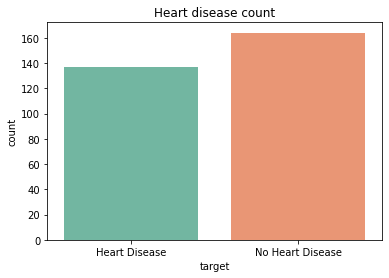

In [51]:
ax = plt.subplot()
sns.countplot(data=df2, x='target')
ax.set_xticklabels(['Heart Disease', 'No Heart Disease'])
plt.title('Heart disease count')

Text(0.5, 1.0, 'Heart disease count by sex')

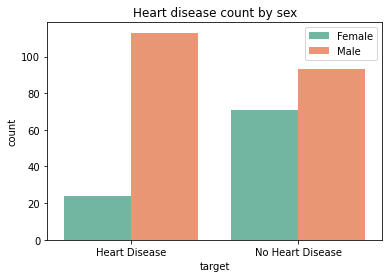

In [28]:
ax = plt.subplot()
sns.countplot(data=df2, x='target', hue='sex')
ax.set_xticklabels(['Heart Disease', 'No Heart Disease'])
plt.legend(['Female', 'Male'])
plt.title('Heart disease count by sex')

Text(0.5, 1.0, 'Heart disease count by chest pain type')

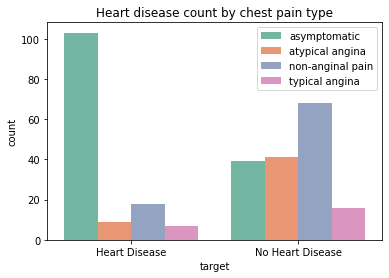

In [29]:
ax = plt.subplot()
sns.countplot(data=df2, x='target', hue='cp')
ax.set_xticklabels(['Heart Disease', 'No Heart Disease'])
plt.legend(['asymptomatic', 'atypical angina', 'non-anginal pain', 'typical angina'])
plt.title('Heart disease count by chest pain type')

Text(0.5, 1.0, 'Heart disease count by thal')

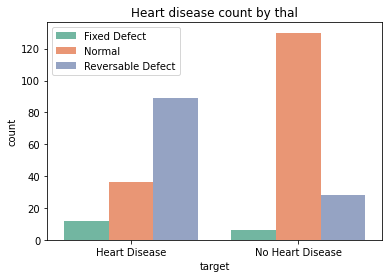

In [31]:
ax = plt.subplot()
sns.countplot(data=df2, x='target', hue='thal')
ax.set_xticklabels(['Heart Disease', 'No Heart Disease'])
plt.legend(['Fixed Defect', 'Normal', 'Reversable Defect'])
plt.title('Heart disease count by thal')

Text(0.5, 1.0, 'Heart disease count by resting electrocardiographic results')

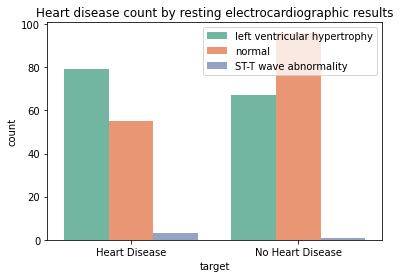

In [33]:
ax = plt.subplot()
sns.countplot(data=df2, x='target', hue='restecg')
ax.set_xticklabels(['Heart Disease', 'No Heart Disease'])
plt.legend(['left ventricular hypertrophy', 'normal', 'ST-T wave abnormality'])
plt.title('Heart disease count by resting electrocardiographic results')

Text(0.5, 1.0, 'Heart disease count by exercised induced angina')

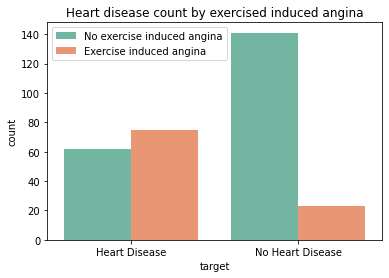

In [34]:
ax = plt.subplot()
sns.countplot(data=df2, x='target', hue='exang')
ax.set_xticklabels(['Heart Disease', 'No Heart Disease'])
plt.legend(['No exercise induced angina', 'Exercise induced angina'])
plt.title('Heart disease count by exercised induced angina')

Text(0.5, 1.0, 'Heart disease count by fasting blood sugar')

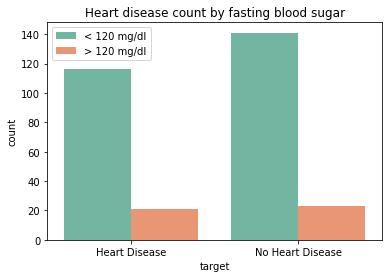

In [61]:
ax = plt.subplot()
sns.countplot(data=df2, x='target', hue='fbs')
ax.set_xticklabels(['Heart Disease', 'No Heart Disease'])
plt.legend(['< 120 mg/dl', '> 120 mg/dl'])
plt.title('Heart disease count by fasting blood sugar')

The mean age for people without heart disease is 52.49390243902439


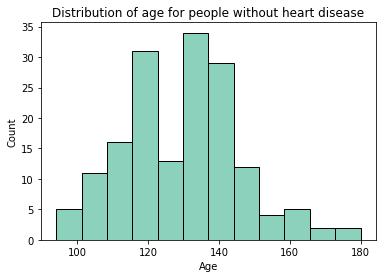

In [56]:
ax = plt.subplot()
data = df2[df2.target == 1] # Data of people without heart disease
sns.histplot(data=data, x='trestbps')
plt.xlabel('Age')
plt.title('Distribution of age for people without heart disease')
print(f'The mean age for people without heart disease is {np.mean(data.age)}')

The average age for people without heart disease is lower

The mean age for people with heart disease is 56.63503649635037


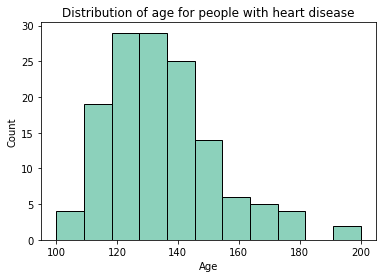

In [57]:
ax = plt.subplot()
data = df2[df2.target == 0] # Data of people with heart disease
sns.histplot(data=data, x='trestbps')
plt.xlabel('Age')
plt.title('Distribution of age for people with heart disease')
print(f'The mean age for people with heart disease is {np.mean(data.age)}')

The average age for people with heart disease is higher

The mean resting blood pressure for people without heart disease is 129.3109756097561 mmHg


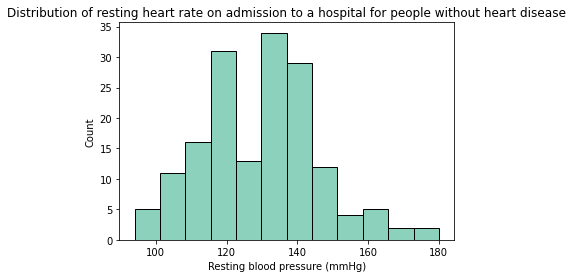

In [55]:
ax = plt.subplot()
data = df2[df2.target == 1] # Data of people without heart disease
sns.histplot(data=data, x='trestbps')
plt.xlabel('Resting blood pressure (mmHg)')
plt.title('Distribution of resting heart rate on admission to a hospital for people without heart disease')
print(f'The mean resting blood pressure for people without heart disease is {np.mean(data.trestbps)} mmHg')

People without heart disease have a lower mean blood pressure and also seems to be bimodal with a sligthly right skew.

The mean resting blood pressure for people with heart disease is 134.44525547445255 mmHg


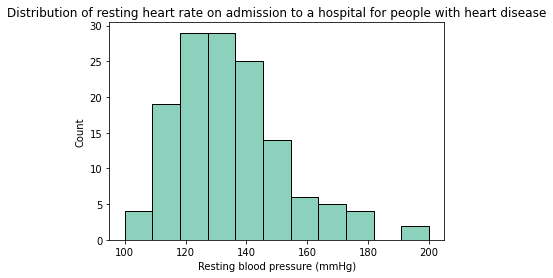

In [53]:
ax = plt.subplot()
data = df2[df2.target == 0] # Data of people with heart disease
sns.histplot(data=data, x='trestbps')
plt.xlabel('Resting blood pressure (mmHg)')
plt.title('Distribution of resting heart rate on admission to a hospital for people with heart disease')
print(f'The mean resting blood pressure for people with heart disease is {np.mean(data.trestbps)} mmHg')

People with heart disease have a higher mean blood pressure and the data is also right skewed.

The mean serum cholestoral for people without heart disease is 242.390243902439 mg/dl


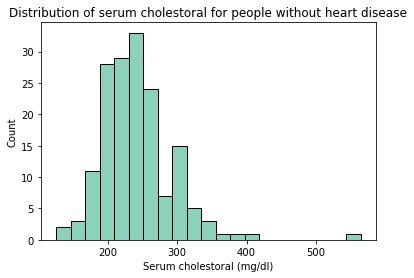

In [59]:
ax = plt.subplot()
data = df2[df2.target == 1] # Data of people without heart disease
sns.histplot(data=data, x='chol')
plt.xlabel('Serum cholestoral (mg/dl)')
plt.title('Distribution of serum cholestoral for people without heart disease')
print(f'The mean serum cholestoral for people without heart disease is {np.mean(data.chol)} mg/dl')

The average serum cholestoral for people without heart disease is lower.

The mean serum cholestoral for people with heart disease is 251.43065693430657 mg/dl


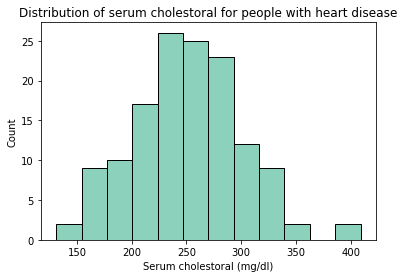

In [60]:
ax = plt.subplot()
data = df2[df2.target == 0] # Data of people with heart disease
sns.histplot(data=data, x='chol')
plt.xlabel('Serum cholestoral (mg/dl)')
plt.title('Distribution of serum cholestoral for people with heart disease')
print(f'The mean serum cholestoral for people with heart disease is {np.mean(data.chol)} mg/dl')

The average serum cholestoral for people with heart disease is higher.

The mean maximum heart rate for people without heart disease is 158.73170731707316


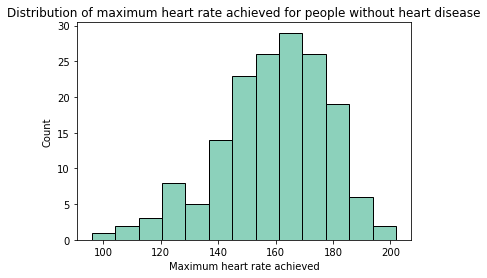

In [62]:
ax = plt.subplot()
data = df2[df2.target == 1] # Data of people without heart disease
sns.histplot(data=data, x='thalach')
plt.xlabel('Maximum heart rate achieved')
plt.title('Distribution of maximum heart rate achieved for people without heart disease')
print(f'The mean maximum heart rate for people without heart disease is {np.mean(data.thalach)}')

The mean maximum heart rate for people with heart disease is 138.97810218978103


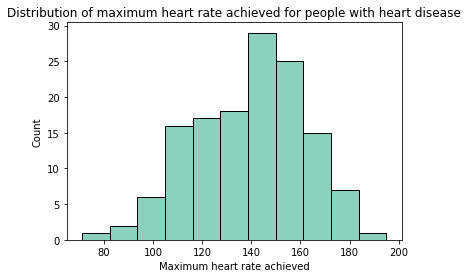

In [63]:
ax = plt.subplot()
data = df2[df2.target == 0] # Data of people with heart disease
sns.histplot(data=data, x='thalach')
plt.xlabel('Maximum heart rate achieved')
plt.title('Distribution of maximum heart rate achieved for people with heart disease')
print(f'The mean maximum heart rate for people with heart disease is {np.mean(data.thalach)}')

People with heart diease had a lower maximum heart rate than those without heart disease. This is because we are not taking into account the age, and the maximum heart rate that a person can achieve without several problems is relative to age, so the higher beats per minute correspond to younger people, thus they are less likely to have a heart disease.

**2.3 Sex**

Text(0.5, 1.0, 'Gender counts')

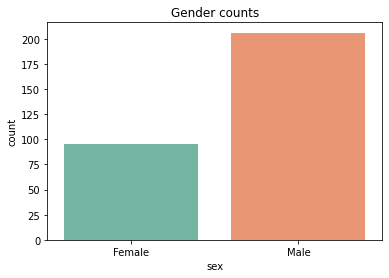

In [64]:
ax = plt.subplot()
sns.countplot(data=df2, x='sex')
ax.set_xticklabels(['Female', 'Male'])
plt.title('Gender counts')

**3 Preprocessing data**

- First the we need to get the features that we want to feed into the machine learning algorithms
- Then we need to normalise the data so that it is all of the same scale
- Next we need to split the data into training and test sets.

In [67]:
ML_features = df2[['age', 'sex', 'cp', 'trestbps', 'fbs', 'restecg', 'thalach', 'exang', 'thal']]
ML_labels = df2['target']

In [71]:
scaler = StandardScaler()
normalised_features = scaler.fit_transform(ML_features)

In [72]:
train_data, test_data, train_labels, test_labels = train_test_split(normalised_features, ML_labels, train_size=0.8, test_size=0.2, random_state=6)

**4 Machine Learning Algorithms**

**4.1 Logistic Regression**

In [134]:
LR_model = LogisticRegression()
LR_model.fit(train_data, train_labels)
predictions = LR_model.predict(test_data)
print(classification_report(test_labels, predictions))
print(f'The score for the logistic regression algorithm is {LR_model.score(test_data, test_labels)}')

              precision    recall  f1-score   support

           0       0.81      0.68      0.74        31
           1       0.71      0.83      0.77        30

    accuracy                           0.75        61
   macro avg       0.76      0.76      0.75        61
weighted avg       0.76      0.75      0.75        61

The score for the logistic regression algorithm is 0.7540983606557377


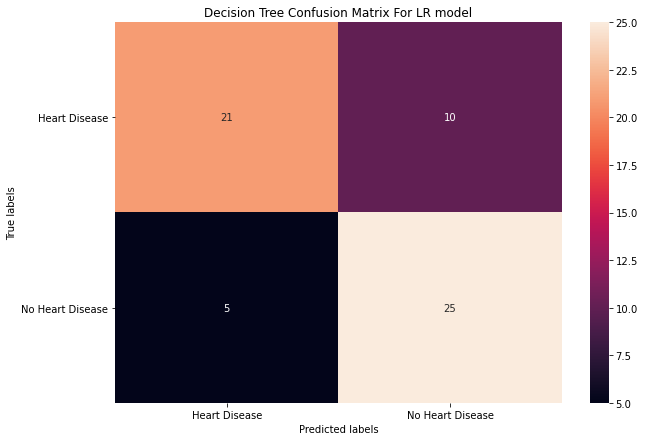

In [117]:
test_predictions = LR_model.predict(test_data)

LR_cm = confusion_matrix(test_labels, test_predictions)

labels = LR_model.classes_

plt.figure(figsize=(10,7))

ax = plt.subplot()

sns.heatmap(LR_cm, annot=True, ax=ax, fmt='d')

ax.set_xlabel('Predicted labels')
ax.set_ylabel('True labels')
ax.set_title('Decision Tree Confusion Matrix For LR model')

ax.yaxis.set_tick_params(rotation=360)

ax.set_xticklabels(['Heart Disease', 'No Heart Disease'])
ax.set_yticklabels(['Heart Disease', 'No Heart Disease'])

plt.show()

Due to the binary nature of the data this heat map is not a great visualisation but it shows how many pieces of data in the test set were correctly predicted.

**4.2 K Nearest Neighbour**

In [122]:
# KNN_model with default neighbours
KNN_model = KNeighborsClassifier() 
KNN_model.fit(train_data, train_labels)
predictions = KNN_model.predict(test_data)
print(classification_report(test_labels, predictions))
print(f'The score for the K nearest neighbours algorithm is {KNN_model.score(test_data, test_labels)}')

              precision    recall  f1-score   support

           0       0.86      0.61      0.72        31
           1       0.69      0.90      0.78        30

    accuracy                           0.75        61
   macro avg       0.78      0.76      0.75        61
weighted avg       0.78      0.75      0.75        61

The score for the K nearest neighbours algorithm is 0.7540983606557377


Text(0.5, 1.0, 'The change in algorithm score as the number of neighbours was changed')

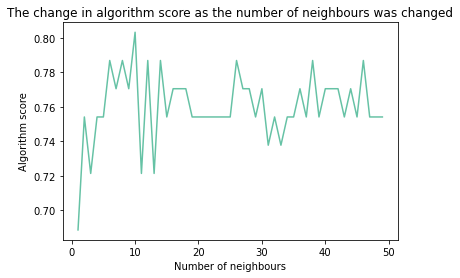

In [123]:
# Do loop to find optimum number of neighbours
scores = []
for k in list(range(1, 50)):
    KNN_model = KNeighborsClassifier(n_neighbors = k)
    KNN_model.fit(train_data, train_labels)
    scores.append(KNN_model.score(test_data, test_labels))
    
plt.plot(list(range(1, 50)), scores)
plt.xlabel('Number of neighbours')
plt.ylabel('Algorithm score')
plt.title('The change in algorithm score as the number of neighbours was changed')

In [124]:
# KNN_model with optimum neighbours
KNN_model = KNeighborsClassifier(n_neighbors = 10) 
KNN_model.fit(train_data, train_labels)
predictions = KNN_model.predict(test_data)
print(classification_report(test_labels, predictions))
print(f'The score for the K nearest neighbours algorithm is {KNN_model.score(test_data, test_labels)}')

              precision    recall  f1-score   support

           0       0.88      0.71      0.79        31
           1       0.75      0.90      0.82        30

    accuracy                           0.80        61
   macro avg       0.81      0.80      0.80        61
weighted avg       0.82      0.80      0.80        61

The score for the K nearest neighbours algorithm is 0.8032786885245902


From this it was found that the optimal number of neighbours for the K nearest neighbours algorithm was 10 based on the sample size

Below a confusion matrix was constructed so that the accuracy of the model could be visualised on a heat map

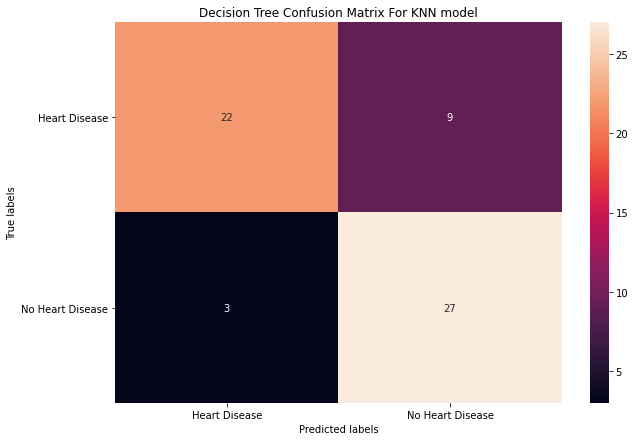

In [125]:
test_predictions = KNN_model.predict(test_data)

KNN_cm = confusion_matrix(test_labels, test_predictions)

labels = KNN_model.classes_

plt.figure(figsize=(10,7))

ax = plt.subplot()

sns.heatmap(KNN_cm, annot=True, ax=ax, fmt='d')

ax.set_xlabel('Predicted labels')
ax.set_ylabel('True labels')
ax.set_title('Decision Tree Confusion Matrix For KNN model')

ax.yaxis.set_tick_params(rotation=360)



ax.set_xticklabels(['Heart Disease', 'No Heart Disease'])
ax.set_yticklabels(['Heart Disease', 'No Heart Disease'])

plt.show()

Due to the binary nature of the data this heat map is not a great visualisation but it shows how many pieces of data in the test set were correctly predicted.

**4.3 Decision Trees**

In [126]:
# Decision Tree with fine tuned max_depth
DT_model = DecisionTreeClassifier()
DT_model.fit(train_data, train_labels)
predictions = DT_model.predict(test_data)
print(DT_model.get_depth()) # Get depth of DT model to see whether the model is suffering from overfitting 
# Max depth was tuned and it was found that when max depth was set as 3 that the accuracy of the model vastly improved from 65% (without a max depth setting) to 75%
print(classification_report(test_labels, predictions))
print(f'The score for the decision tree algorithm is {DT_model.score(test_data, test_labels)}')

10
              precision    recall  f1-score   support

           0       0.68      0.61      0.64        31
           1       0.64      0.70      0.67        30

    accuracy                           0.66        61
   macro avg       0.66      0.66      0.66        61
weighted avg       0.66      0.66      0.66        61

The score for the decision tree algorithm is 0.6557377049180327


In [128]:
# Decision Tree with fine tuned max_depth
DT_model = DecisionTreeClassifier(max_depth=3)
DT_model.fit(train_data, train_labels)
predictions = DT_model.predict(test_data)
print(classification_report(test_labels, predictions))
print(f'The score for the decision tree algorithm is {DT_model.score(test_data, test_labels)}')

              precision    recall  f1-score   support

           0       0.83      0.65      0.73        31
           1       0.70      0.87      0.78        30

    accuracy                           0.75        61
   macro avg       0.77      0.76      0.75        61
weighted avg       0.77      0.75      0.75        61

The score for the decision tree algorithm is 0.7540983606557377


Max depth was tuned and it was found that when max depth was set as 3 that the accuracy of the model vastly improved from 65% (without a max depth setting) to 75%


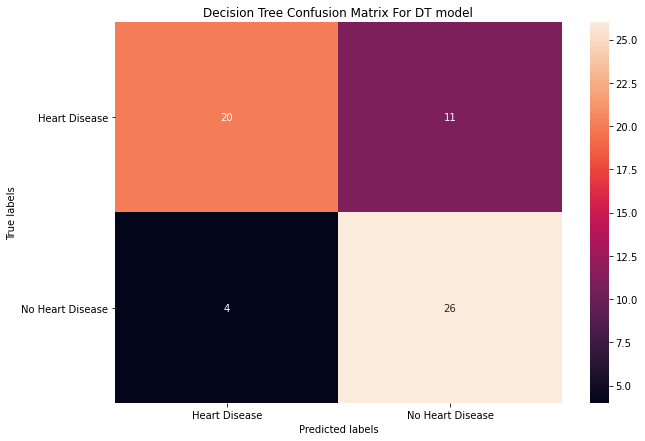

In [129]:
test_predictions = DT_model.predict(test_data)

DT_cm = confusion_matrix(test_labels, test_predictions)

labels = DT_model.classes_

plt.figure(figsize=(10,7))

ax = plt.subplot()

sns.heatmap(DT_cm, annot=True, ax=ax, fmt='d')

ax.set_xlabel('Predicted labels')
ax.set_ylabel('True labels')
ax.set_title('Decision Tree Confusion Matrix For DT model')

ax.yaxis.set_tick_params(rotation=360)

ax.set_xticklabels(['Heart Disease', 'No Heart Disease'])
ax.set_yticklabels(['Heart Disease', 'No Heart Disease'])

plt.show()

Due to the binary nature of the data this heat map is not a great visualisation but it shows how many pieces of data in the test set were correctly predicted.

**4.4 Random Forest**

In [105]:
RF_model = RandomForestClassifier() # Could alter the n_estimators
RF_model.fit(train_data, train_labels)
predictions = RF_model.predict(test_data)
print(classification_report(test_labels, predictions))
print(f'The score for the random forest algorithm is {RF_model.score(test_data, test_labels)}')

              precision    recall  f1-score   support

           0       0.77      0.74      0.75        31
           1       0.74      0.77      0.75        30

    accuracy                           0.75        61
   macro avg       0.75      0.75      0.75        61
weighted avg       0.75      0.75      0.75        61

The score for the random forest algorithm is 0.7540983606557377


It was found that increasing the number of estimators did not improve the accuracy of the model. Therefore, the number of estimators was left at the default of 100 as to not increase the computational time of the algorithm.

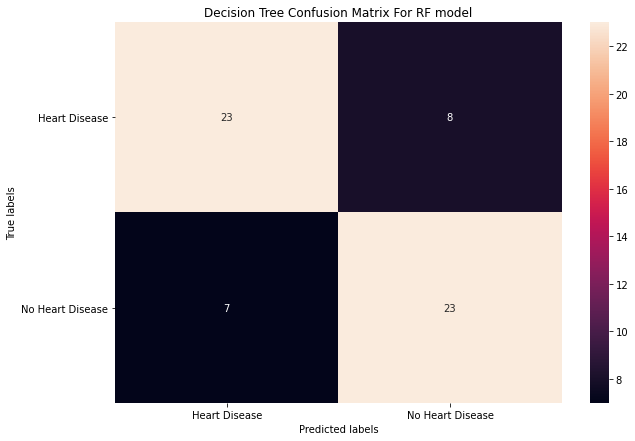

In [119]:
test_predictions = RF_model.predict(test_data)

RF_cm = confusion_matrix(test_labels, test_predictions)

labels = RF_model.classes_

plt.figure(figsize=(10,7))

ax = plt.subplot()

sns.heatmap(RF_cm, annot=True, ax=ax, fmt='d')

ax.set_xlabel('Predicted labels')
ax.set_ylabel('True labels')
ax.set_title('Decision Tree Confusion Matrix For RF model')

ax.yaxis.set_tick_params(rotation=360)

ax.set_xticklabels(['Heart Disease', 'No Heart Disease'])
ax.set_yticklabels(['Heart Disease', 'No Heart Disease'])

plt.show()

Due to the binary nature of the data this heat map is not a great visualisation but it shows how many pieces of data in the test set were correctly predicted.

**5 KFold and Cross validation scoring**

Cross validation was done to check the results of the model scorings

**5.1 Logistic Regression**

In [130]:
kfold = KFold(n_splits=5, shuffle=True, random_state=0)
results = cross_val_score(LR_model, train_data, train_labels, cv=kfold, scoring='accuracy')

print(results)
print("Baseline: %.2f%% (%.2f%%)" % (results.mean()*100, results.std()*100))

[0.66666667 0.875      0.79166667 0.77083333 0.77083333]
Baseline: 77.50% (6.64%)


**5.2 K Nearest Neighbours**

In [131]:
kfold = KFold(n_splits=5, shuffle=True, random_state=0)
results = cross_val_score(KNN_model, train_data, train_labels, cv=kfold, scoring='accuracy')

print(results)
print("Baseline: %.2f%% (%.2f%%)" % (results.mean()*100, results.std()*100))

[0.70833333 0.875      0.83333333 0.79166667 0.8125    ]
Baseline: 80.42% (5.53%)


**5.3 Decision Tree**

In [132]:
kfold = KFold(n_splits=5, shuffle=True, random_state=0)
results = cross_val_score(DT_model, train_data, train_labels, cv=kfold, scoring='accuracy')

print(results)
print("Baseline: %.2f%% (%.2f%%)" % (results.mean()*100, results.std()*100))

[0.70833333 0.875      0.72916667 0.70833333 0.8125    ]
Baseline: 76.67% (6.64%)


**5.4 Random Forest**

In [133]:
kfold = KFold(n_splits=5, shuffle=True, random_state=0)
results = cross_val_score(RF_model, train_data, train_labels, cv=kfold, scoring='accuracy')

print(results)
print("Baseline: %.2f%% (%.2f%%)" % (results.mean()*100, results.std()*100))

[0.72916667 0.8125     0.8125     0.79166667 0.79166667]
Baseline: 78.75% (3.06%)


Through the cross validation scoring the algorithms the scores of each algorithm were found to be slightly higher than was previously found. This means that the algorithms were found to be slighly more accurate than was previously thought. However, the KNN model was still found to be the most accurate model out of the 4.

**6 Conclusions**

- Various relationships were found between different features in the datsets
- It was found that the average values for age, resting blood pressure and serum cholestoral were higher for people with heart disease than those without heart disease, which is to be expected.
- People with heart diease had a lower maximum heart rate than those without heart disease. This is because we are not taking into account the age, and the maximum heart rate that a person can achieve without several problems is relative to age, so the higher beats per minute correspond to younger people, thus they are less likely to have a heart disease.
- Machine learning algorithms were implemented so that predictions could be made based on various feautures from the datasets. It was found that the K nearest neighbours algorithm fitted the data the most accurately, as shown through the score of the algorithm. However, all the algorithms fitted the data well, giving a good predictive score.
- The K nearest neighbours algorithm was optimised to see what the optimum number of neighbours was. It was found that 10 neighbours was optimal.
- Cross validation scoring was then carried out for all of the algorithms and it was found that the accuracy of the algorithms were slightly better than previously thought. However, the K nearest neighbour algorithm was still found to be the most accurate.
- Overall it was decided that the KNN algorithm should be chosen for any future predictions.
- In conclusion, I had fun doing this project!

**7 Further work**

- The data could be further investigated to see if there are any other interesting correlations between features.
- Further work could be done to improve this project such as further optimisation of the machine learning algorithms to find the best parameters for each.
- Different features of the original dataset could be implemented for training and testing the algorithms to see how they would affect the scores of each.
- Furthermore, different classification algorithms could be implemented to see if they would fit the data better, such as the support vector machine (SVM) algorithm.